# Employee Turnover Prediction

This notebook provides a step-by-step guide to predicting employee turnover using logistic regression and random forest classification. We will start by importing the necessary libraries, then load and preprocess the dataset, followed by training and evaluating our models.

## Importing Necessary Libraries

First, we need to import the libraries required for data manipulation, visualization, and building machine learning models.

In [1]:
import pandas as pd
hr = pd.read_csv('../Dataset/HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head()

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
hr=hr.rename(columns = {'sales':'department'})

## Load Dataset

We will load the employee dataset and perform initial preprocessing to clean and prepare the data for modeling.

In [3]:
hr.shape


(14999, 10)

In [4]:
hr['department'].unique()


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [5]:
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

## Rename Columns

Next, we will rename some columns for better readability and consistency.

In [6]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

## Combine Similar Categories

We will combine similar categories in the 'department' column to reduce the number of unique values and simplify the analysis.

In [7]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

## Creating Dummy Variables

We need to convert categorical variables into dummy/indicator variables for use in our models.

In [8]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [9]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression()

# Initialize RFE with the model and the number of features to select
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE to your data
rfe = rfe.fit(hr[X], hr[y])

# Print the results
print(rfe.support_)
print(rfe.ranking_)


C:\Users\Hari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hari\AppData\Local\Pa

[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


C:\Users\Hari\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Splitting the Data

We split the data into training and testing sets to evaluate the performance of our models.

## Define Features and Target Variable

Next, we define the features (independent variables) and the target variable (dependent variable) for our models.

In [10]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Use the trained model to make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Optionally, you can also print other metrics such as the confusion matrix and classification report
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = metrics.classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')


Accuracy: 0.77
Confusion Matrix:
[[3194  268]
 [ 765  273]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



## Random Forest Model

Next, we train a random forest classifier and evaluate its accuracy.

## Feature Selection

We use Recursive Feature Elimination (RFE) to select the most important features for our models.

In [12]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.770


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

## Logistic Regression Model

We will train a logistic regression model and evaluate its accuracy.

In [14]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))


Random Forest Accuracy: 0.977


In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.94      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



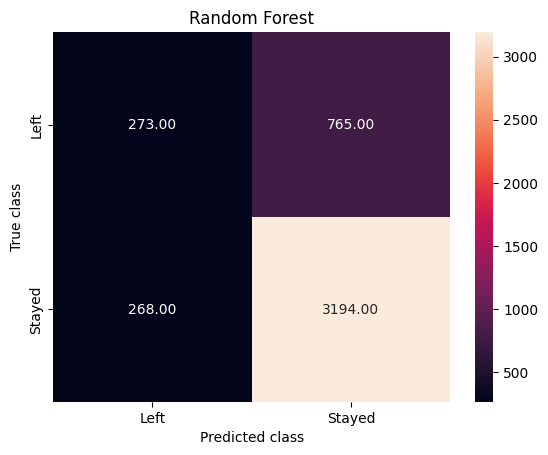

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
forest_cm = confusion_matrix(y_test, y_pred, labels=[1, 0])

# Plot the confusion matrix
sns.heatmap(forest_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()


In [17]:
print(classification_report(y_test, logreg.predict(X_test)))


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.50      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



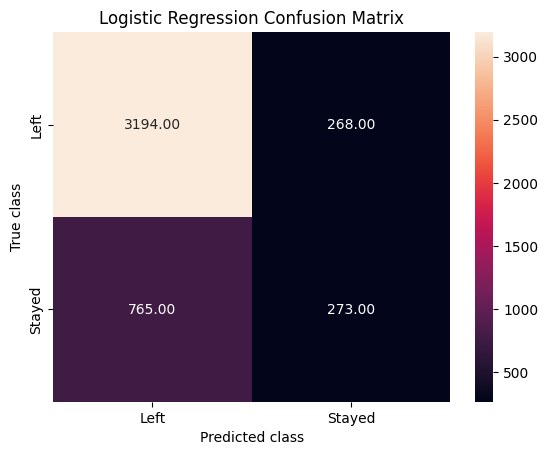

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
logreg_classification_report = classification_report(y_test, logreg.predict(X_test))
print('Logistic Regression Classification Report:\n', logreg_classification_report)
logreg_cm = confusion_matrix(y_test, logreg.predict(X_test))
sns.heatmap(logreg_cm, annot=True, fmt='.2f', xticklabels=["Left", "Stayed"], yticklabels=["Left", "Stayed"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression Confusion Matrix')
plt.show()


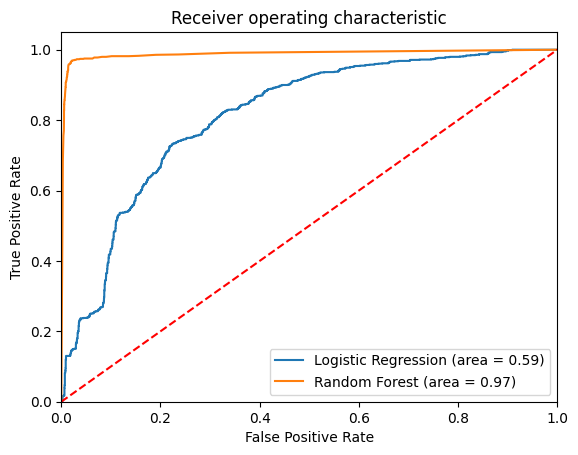

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## Model Evaluation

We will generate classification reports and confusion matrices to evaluate the performance of our models.

In [20]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_management-0.23%
promotion_last_5years-0.24%
department_RandD-0.31%
department_hr-0.32%
salary_high-0.66%
salary_low-1.20%
Work_accident-1.57%
last_evaluation-18.56%
time_spend_company-26.89%
satisfaction_level-50.02%
